In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from insitupy import read_xenium
import mellon
import palantir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Xenium data into `InSituData` object

Now the Xenium data can be parsed by providing the data path to the `InSituPy` project folder.

In [4]:
insitupy_project = Path("../../demo_dataset/demo_insitupy_project")

In [6]:
xd = read_xenium(insitupy_project)
xd.load_images()
xd.load_cells()

Loading images...
['nuclei', 'CD20', 'HER2', 'DAPI', 'HE']
Loading cells...
	No alternative cells found...


In [7]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       DAPI:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 163565 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden', 'annotations-TestKey', 'annotations-demo', 'annotations-demo2', 'annotations-demo3', 'cell_type'
           var: 'gene_ids', 'feature_types', 'genome'
           uns: 'cell_type_colors', 'counts_location', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
           obsm: 'OT', 'X_pca', 'X_umap', 'spatial'
           varm: 'OT', 'PCs', 'binned_expression'
           layers: 'counts', 'norm_counts'
           obsp: 'connec

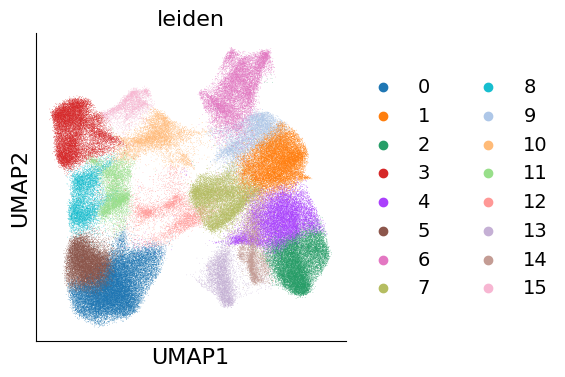

In [8]:
import scanpy as sc
sc.pl.umap(adata=xd.cells.matrix, color="leiden")

## Import annotations

In [9]:
xd.import_regions(
    files="../../demo_regions/regions-Tumor.geojson",
    keys="Tumor"
)

Importing regions...


## Select small region for demonstration purposes

In [10]:
xdcrop = xd.crop(region_tuple=("Tumor", "Selected Tumor"))

# access transcriptomic data in anndata format from InSituData object
adata = xdcrop.cells.matrix

In [14]:
xdcrop.save_current_colorlegend("test.png")

Figure saved as test.png


In [12]:
xdcrop.show()

Invalid schema for package 'ome-types', please run 'npe2 validate ome-types' to check for manifest errors.


In [15]:
xdcrop.save_current_colorlegend("test.png")

Figure saved as test.png


In [12]:
import insitupy._core.config as config

In [24]:
xdcrop.save_current_colorlegend("test.png")

In [21]:
config.static_canvas.figure

RuntimeError: wrapped C/C++ object of type FigureCanvasQTAgg has been deleted

<Figure size 662x158 with 2 Axes>

In [16]:
config.static_canvas.figure.savefig("test.png")

In [11]:
from insitupy.plotting.plots import plot_colorlegend

In [12]:
plot_colorlegend(xdcrop.viewer)

ValueError: No layer with cellular transcriptomic data found. First add a layer using the 'Show Data' widget.

In [ ]:
import insitupy._core.config as config

In [ ]:
config.static_canvas

In [19]:
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.gridspec import GridSpec
from insitupy.plotting._colors import _data_to_rgba
from matplotlib.lines import Line2D
import math

# Function to update the legend
def _update_categorical_legend(static_canvas, mapping, label, max_rows: int = 6):

    # Calculate the number of columns needed
    num_items = len(mapping)
    ncols = math.ceil(num_items / max_rows)

    static_canvas.figure.clear()  # Clear the current figure
    axes = static_canvas.figure.subplots()  # Create new axes
    legend_handles = [Line2D([0], [0],
                             marker='o', color='w', label=n,
                             markerfacecolor=c, markeredgecolor='k',
                             markersize=7) for n,c in mapping.items()]
    axes.legend(handles=legend_handles, loc="center", title=label, ncols=ncols,
                fontsize=8, title_fontsize=10,
                labelspacing=0.7, borderpad=0.5)
    axes.set_axis_off()
    static_canvas.draw()  # Redraw the canvas

def _update_continuous_legend(static_canvas, mapping, label):
    static_canvas.figure.clear()  # Clear the current figure
    gs = GridSpec(1, 1, top=1.2, bottom=0.6, left=-0.5, right=1.5)  # Define the grid spec
    axes = static_canvas.figure.add_subplot(gs[0])  # Add subplot with the grid spec

    colorbar = static_canvas.figure.colorbar(mapping, ax=axes, orientation='horizontal')
    colorbar.set_label(label, fontsize=10)
    colorbar.ax.tick_params(labelsize=8)  # Adjust tick label size
    #colorbar.set_ticks(np.linspace(norm.vmin, norm.vmax, num=5))  # Set the number of ticks
    axes.set_axis_off()
    static_canvas.draw()  # Redraw the canvas

def update_colorbar(viewer, static_canvas):

    #layer = viewer.layers[-1]

    # automatically get layer
    candidate_layers = [l for l in viewer.layers if l.name.startswith(f"{config.current_data_name}")]
    try:
        layer_name = candidate_layers[0].name
    except IndexError:
        raise ValueError("No layer with cellular transcriptomic data found. First add a layer using the 'Show Data' widget.")

    # extract layer
    layer = viewer.layers[layer_name]

    # get values
    values = layer.properties["value"]

    # create color mapping
    rgba_list, mapping = _data_to_rgba(values, return_mapping=True)

    if isinstance(mapping, dict):
        _update_categorical_legend(static_canvas=static_canvas,
                                   mapping=mapping, label=layer.name)
    else:
        _update_continuous_legend(static_canvas=static_canvas,
                                  mapping=mapping,
                                  label=layer.name)

In [23]:
update_colorbar(viewer=xdcrop.viewer, static_canvas=config.static_canvas)

In [22]:
config.static_canvas

In [98]:
xdcrop.show()

In [25]:
xdcrop.viewer.layers[0]

<Image layer 'nuclei' at 0x1eb3a9d2df0>